In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

In [94]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
#Display the updated number of unique mice IDs.
mouse_metadata.count()["Mouse ID"]

249

In [96]:
# Looking for mouse ID with more values
combined_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [97]:
combined_df.loc[combined_df["Mouse ID"] == "g989", :].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [98]:
# removing mouse ID g989 due to duplicate values
cleaned_combined_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# validating that there are 248 unique mouse id's left in cleaned df
cleaned_combined_df["Mouse ID"].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [100]:
#Mean Tumor Volume
mean_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

#Median Tumor Volume
mediam_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

#Tumor Volume Variance
var_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

#Tumor Volume Std. Dev.
std_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

#Tumor Volume Std. Err.
sem_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#Tumor Volume Stats Summary
tumor_volume_stats_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                           "Median Tumor Volume": mediam_tumor_volume,
                                           "Tumor Volume Variance": var_tumor_volume,
                                           "Tumor Volume Std. Dev.": std_tumor_volume,
                                           "Tumor Volume Std. Err.": sem_tumor_volume})
tumor_volume_stats_summary

/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_35583/4169770888.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_35583/4169770888.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mediam_tumor_volume = cleaned_combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_35583/4169770888.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is depr

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

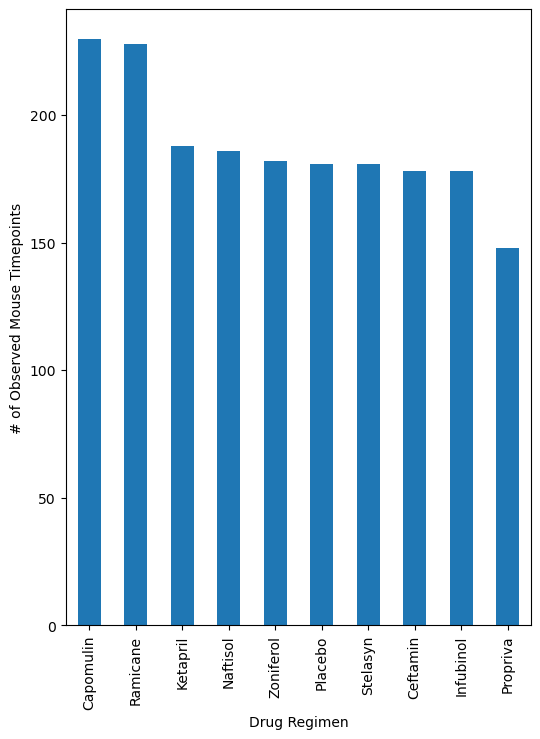

In [101]:
## Create Bar Charts and Pie Charts
# Create the first bar chart with the Pandas DataFrame.plot() method.

drug_regimen = cleaned_combined_df.groupby('Drug Regimen')
tp_count = drug_regimen['Timepoint'].count()
tp_count_sort = tp_count.sort_values(ascending=False)
count_chart = tp_count_sort.plot(kind='bar', figsize=(6,8))
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")


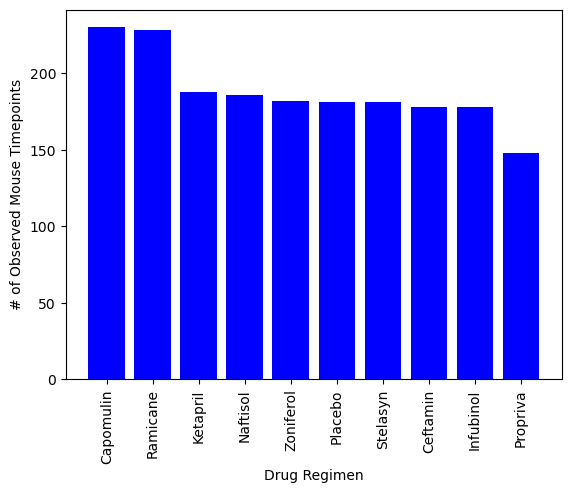

In [102]:
# Create the second bar chart with Matplotlib’s pyplot methods.
drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
time_point_counts = 230, 228, 188, 186, 182, 181, 181, 178, 178, 148
x_axis = np.arange(len(time_point_counts))

plt.bar(x_axis, time_point_counts, color='blue')
tick_marks = [value for value in x_axis]
plt.xticks(tick_marks, drug_regimen, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

Text(0.5, 24.0, 'Sex')

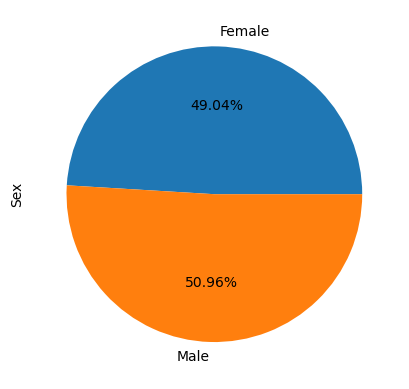

In [103]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.
# Create the first pie chart with the Pandas DataFrame.plot() method
sex = cleaned_combined_df.groupby('Sex')
sex_count = sex['Sex'].count()
pie_chart = sex_count.plot(kind='pie', y='Mouse ID', autopct='%.2f%%')
count_chart.set_xlabel("Sex")



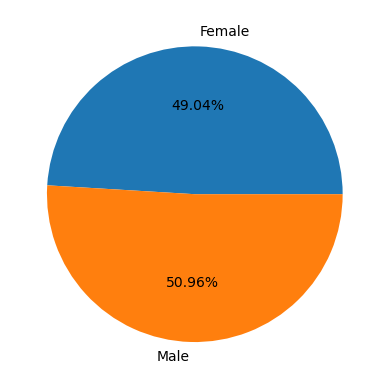

In [104]:
sex = ["Female", "Male"]
plt.pie(sex_count, autopct='%.2f%%', labels=sex)
plt.show()

In [106]:
## Calculate Quartiles, Find Outliers, and Create a Box Plot

#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
greatest_timepoint_mouse_df = pd.DataFrame(cleaned_combined_df.groupby(["Mouse ID"]).max()["Timepoint"])
greatest_timepoint_mouse_df

#Merge this grouped DataFrame with the original cleaned DataFrame.
greatest_tp_combined = pd.merge(greatest_timepoint_mouse_df, cleaned_combined_df, how="inner", on=["Mouse ID", "Timepoint"])
greatest_tp_combined

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


outliers, too low:Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too high:Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too low:Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too high:Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too low:Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
outliers, too high:Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too low:Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers, too high:Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

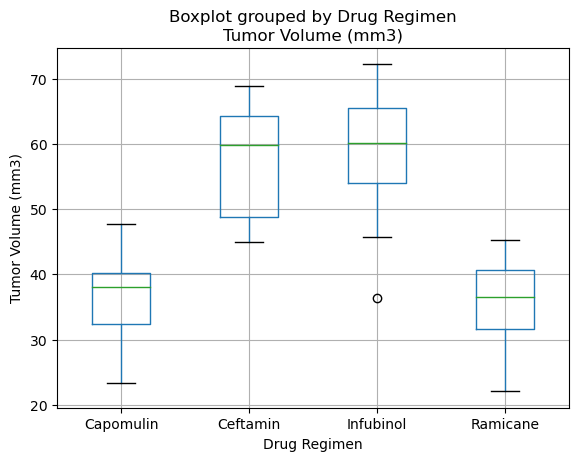

In [108]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 

for drug in treatment_list:
    drugs = greatest_tp_combined[greatest_tp_combined['Drug Regimen'] == drug]["Tumor Volume (mm3)"]
    quantiles = drugs.quantile([.25,.5,.75])
    lowerq = quantiles[.25]
    upperq = quantiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers by using the upper and lower bounds, and then print the results.
    outside_upper = drugs.loc[upper_bound < drugs ]
    outside_lower = drugs.loc[drugs < lower_bound]
    
    #outside_lower = drugs.query('drugs > upper_bound & drugs < lower_bouund')
    
    print(f"outliers, too low:{drug}: {outside_lower}")
    print(f"outliers, too high:{drug}: {outside_upper}")


# Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume 
box_plot_filtered = greatest_tp_combined.loc[(greatest_tp_combined["Drug Regimen"]=="Capomulin") | (greatest_tp_combined["Drug Regimen"] == "Ramicane") | (greatest_tp_combined["Drug Regimen"] == "Infubinol") | (greatest_tp_combined["Drug Regimen"] == "Ceftamin"), :]
box_plot_filtered.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", ylabel="Tumor Volume (mm3)")

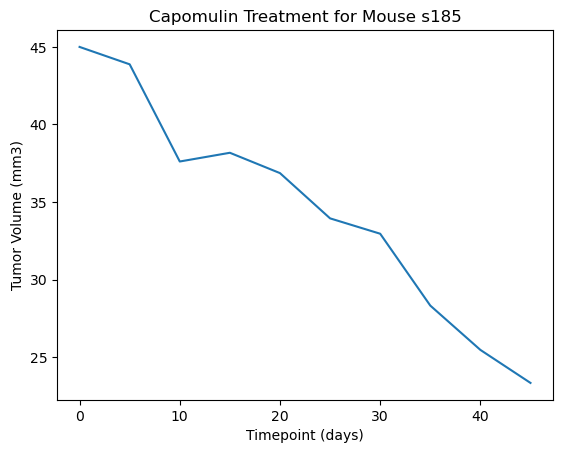

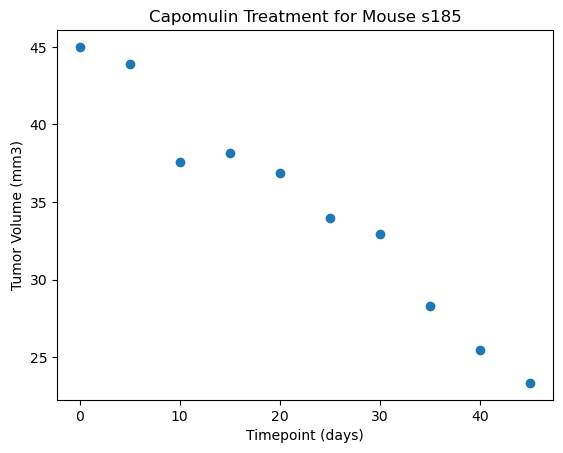

In [109]:
## Create a Line Plot and a Scatter Plot
# Select a mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.
mouse_s185_df = combined_df.loc[combined_df["Mouse ID"] == "s185", :]
mouse_s185_df

s185_tum_vol = mouse_s185_df[["Tumor Volume (mm3)"]]
s185_time_pt = mouse_s185_df[["Timepoint"]]

plt.plot(s185_time_pt, s185_tum_vol)
plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
plt.scatter(s185_time_pt, s185_tum_vol, marker="o")
plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()





In [38]:
## Calculate Correlation and Regression

capomulin_df = cleaned_combined_df.loc[(cleaned_combined_df["Drug Regimen"]=="Capomulin")]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_35583/3990041414.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_35583/3990041414.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_tum_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]


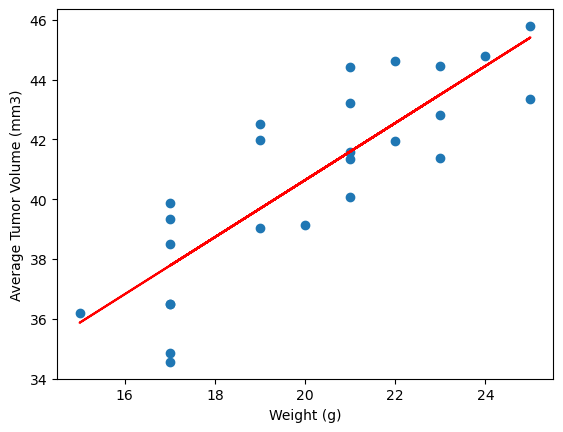

'The correlation between the mouse weight (g) and tumor volume is 0.84'

In [113]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.

# Plot the linear regression model on top of the previous scatter plot.

capomulin_weight = capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
capomulin_tum_mean = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_tum_mean)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(capomulin_weight,capomulin_tum_mean)
plt.plot(capomulin_weight, regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


correlation = st.pearsonr(capomulin_weight, capomulin_tum_mean)
f"The correlation between the mouse weight (g) and tumor volume is {round(correlation[0],2)}" 